<a href="https://colab.research.google.com/github/rodjoel/practices/blob/main/Copia_de_Proyecto_1_Data_Analytics_con_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Proyecto 1 - Proceso de generación de valor por extración de datos


Este proyecto esta diseñado para que usted pueda:

1.   Poner en práctica los conocimientos específicos del leguaje Python y las bibliotecas de Pandas, Matplotlib con Seaborn y numpy
2.   Generar una plantilla reutilizable de un proceso de limpieza, consolidación y carga de datos
3.   Aplicar los conocimientos analizando una base de datos del mundo real.

Utilizaremos el dataset superstore que puede encontar en la carpeta de datasets de Google Drive. Este es la información de ventas y ordenes de cuatro años de una tienda en línea y le permitirá hacer análisis de ventas, categorías etc.

Mantenga en mente que algunos errores en carga y limpieza de datos pueden surgir. Su tarea es identificarlos y sobreponerse a ellos.



# Importar Datos e Identificar variables a limpiar

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive

In [ ]:
%matplotlib inline

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Superstore_dataset/Copia de superstore_dataset2011-2015-1.csv', encoding = "ISO-8859-1")

In [ ]:
df.describe()

,Row ID,Postal Code,Sales,Quantity,Discount,Profit,Shipping Cost
count,10260.000000,2115.000000,10260.000000,10260.000000,10260.000000,10260.000000,10260.000000
mean,25932.744737,52651.387707,248.727482,3.476121,0.141606,31.846185,26.246308
std,14731.637159,32172.487411,499.159788,2.246292,0.211743,181.545839,56.746456
min,12.000000,1040.000000,0.898000,1.000000,0.000000,-1869.876000,0.010000
25%,13239.750000,19853.000000,31.225500,2.000000,0.000000,0.000000,2.730000
50%,25967.000000,48640.000000,84.999000,3.000000,0.000000,9.513000,7.790000
75%,38546.250000,85204.000000,251.842500,5.000000,0.200000,36.757050,24.310000
max,51289.000000,99301.000000,17499.950000,14.000000,0.800000,8399.976000,923.630000


In [ ]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,42433,AG-2011-2040,1/1/2011,6/1/2011,Standard Class,TB-11280,Toby Braunhardt,Consumer,Constantine,Constantine,...,OFF-TEN-10000025,Office Supplies,Storage,"Tenex Lockers, Blue",408.300,2,0.0,106.140,35.46,Medium
1,22253,IN-2011-47883,1/1/2011,8/1/2011,Standard Class,JH-15985,Joseph Holt,Consumer,Wagga Wagga,New South Wales,...,OFF-SU-10000618,Office Supplies,Supplies,"Acme Trimmer, High Speed",120.366,3,0.1,36.036,9.72,Medium
2,48883,HU-2011-1220,1/1/2011,5/1/2011,Second Class,AT-735,Annie Thurman,Consumer,Budapest,Budapest,...,OFF-TEN-10001585,Office Supplies,Storage,"Tenex Box, Single Width",66.120,4,0.0,29.640,8.17,High
3,11731,IT-2011-3647632,1/1/2011,5/1/2011,Second Class,EM-14140,Eugene Moren,Home Office,Stockholm,Stockholm,...,OFF-PA-10001492,Office Supplies,Paper,"Enermax Note Cards, Premium",44.865,3,0.5,-26.055,4.82,High
4,22255,IN-2011-47883,1/1/2011,8/1/2011,Standard Class,JH-15985,Joseph Holt,Consumer,Wagga Wagga,New South Wales,...,FUR-FU-10003447,Furniture,Furnishings,"Eldon Light Bulb, Duo Pack",113.670,5,0.1,37.770,4.70,Medium


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10260 entries, 0 to 10259
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Row ID          10260 non-null  int64  
 1   Order ID        10260 non-null  object 
 2   Order Date      10260 non-null  object 
 3   Ship Date       10260 non-null  object 
 4   Ship Mode       10260 non-null  object 
 5   Customer ID     10260 non-null  object 
 6   Customer Name   10260 non-null  object 
 7   Segment         10260 non-null  object 
 8   City            10260 non-null  object 
 9   State           10260 non-null  object 
 10  Country         10260 non-null  object 
 11  Postal Code     2115 non-null   float64
 12  Market          10260 non-null  object 
 13  Region          10260 non-null  object 
 14  Product ID      10260 non-null  object 
 15  Category        10260 non-null  object 
 16  Sub-Category    10260 non-null  object 
 17  Product Name    10260 non-null 

In [ ]:
df.isnull().sum()

Row ID               0
Order ID             0
Order Date           0
Ship Date            0
Ship Mode            0
Customer ID          0
Customer Name        0
Segment              0
City                 0
State                0
Country              0
Postal Code       8145
Market               0
Region               0
Product ID           0
Category             0
Sub-Category         0
Product Name         0
Sales                0
Quantity             0
Discount             0
Profit               0
Shipping Cost        0
Order Priority       0
dtype: int64

In [ ]:
df.drop(['Postal Code'], axis=1, inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10260 entries, 0 to 10259
Data columns (total 23 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Row ID          10260 non-null  int64  
 1   Order ID        10260 non-null  object 
 2   Order Date      10260 non-null  object 
 3   Ship Date       10260 non-null  object 
 4   Ship Mode       10260 non-null  object 
 5   Customer ID     10260 non-null  object 
 6   Customer Name   10260 non-null  object 
 7   Segment         10260 non-null  object 
 8   City            10260 non-null  object 
 9   State           10260 non-null  object 
 10  Country         10260 non-null  object 
 11  Market          10260 non-null  object 
 12  Region          10260 non-null  object 
 13  Product ID      10260 non-null  object 
 14  Category        10260 non-null  object 
 15  Sub-Category    10260 non-null  object 
 16  Product Name    10260 non-null  object 
 17  Sales           10260 non-null 

In [ ]:
import os

In [ ]:
path = r'/content/drive/MyDrive/Superstore_dataset'
files = os.listdir(path)
df_sps = pd.DataFrame()
for file in files:
  df_temp = pd.read_csv(path + "/"+ file, encoding = "ISO-8859-1")
  df_sps = pd.concat([df_sps, df_temp], ignore_index=True)

In [ ]:
df_sps.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61550 entries, 0 to 61549
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Row ID          61550 non-null  int64  
 1   Order ID        61550 non-null  object 
 2   Order Date      61550 non-null  object 
 3   Ship Date       61550 non-null  object 
 4   Ship Mode       61550 non-null  object 
 5   Customer ID     61550 non-null  object 
 6   Customer Name   61550 non-null  object 
 7   Segment         61550 non-null  object 
 8   City            61550 non-null  object 
 9   State           61550 non-null  object 
 10  Country         61550 non-null  object 
 11  Postal Code     11899 non-null  float64
 12  Market          61550 non-null  object 
 13  Region          61550 non-null  object 
 14  Product ID      61550 non-null  object 
 15  Category        61550 non-null  object 
 16  Sub-Category    61550 non-null  object 
 17  Product Name    61550 non-null 

# Limpieza de Datos

In [ ]:
df_sps.drop(['Postal Code'], axis=1, inplace=True)

In [ ]:
df_sps.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61550 entries, 0 to 61549
Data columns (total 23 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Row ID          61550 non-null  int64  
 1   Order ID        61550 non-null  object 
 2   Order Date      61550 non-null  object 
 3   Ship Date       61550 non-null  object 
 4   Ship Mode       61550 non-null  object 
 5   Customer ID     61550 non-null  object 
 6   Customer Name   61550 non-null  object 
 7   Segment         61550 non-null  object 
 8   City            61550 non-null  object 
 9   State           61550 non-null  object 
 10  Country         61550 non-null  object 
 11  Market          61550 non-null  object 
 12  Region          61550 non-null  object 
 13  Product ID      61550 non-null  object 
 14  Category        61550 non-null  object 
 15  Sub-Category    61550 non-null  object 
 16  Product Name    61550 non-null  object 
 17  Sales           61550 non-null 

In [ ]:
df_sps.duplicated().sum()

10260

In [ ]:
  df_temp['Order Date']= pd.to_datetime(df['Order Date'])
  df_temp['Ship Date']= pd.to_datetime(df['Ship Date'])

In [ ]:
df_sps.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,7694,MX-2011-157049,13-06-2011,13-06-2011,Same Day,BD-11560,Brendan Dodson,Home Office,Cuajimalpa,Distrito Federal,...,TEC-CO-10003964,Technology,Copiers,"Canon Fax Machine, High-Speed",631.91364,3,0.002,87.35364,78.28,Critical
1,15772,ES-2011-1276768,13-06-2011,18-06-2011,Standard Class,JO-15145,Jack O'Briant,Corporate,Thonon-les-Bains,Rhône-Alpes,...,FUR-BO-10000847,Furniture,Bookcases,"Dania Stackable Bookrack, Mobile",437.72400,4,0.100,165.32400,68.34,High
2,10075,US-2011-102288,13-06-2011,17-06-2011,Standard Class,KT-16465,Kean Takahito,Consumer,Presidente Dutra,Maranhão,...,FUR-CH-10004801,Furniture,Chairs,"Office Star Bag Chairs, Set of Two",215.37600,14,0.600,-231.78400,39.85,High
3,15771,ES-2011-1276768,13-06-2011,18-06-2011,Standard Class,JO-15145,Jack O'Briant,Corporate,Thonon-les-Bains,Rhône-Alpes,...,FUR-BO-10000895,Furniture,Bookcases,"Sauder Corner Shelving, Metal",264.16800,2,0.100,55.72800,30.14,High
4,27155,IN-2011-51390,13-06-2011,17-06-2011,Standard Class,RB-19705,Roger Barcio,Home Office,Palembang,Sumatera Selatan,...,FUR-CH-10000660,Furniture,Chairs,"Novimex Executive Leather Armchair, Adjustable",332.52960,1,0.270,18.21960,30.14,Medium


# Explorando datos

Conectar a la nueva base de datos

# Analizando Categorías, tendencias, medias y creando valor

Su función será crear un "deep dive" que explorara 2 a 4 preguntas de negocios que pueda hacer con los datos: ¿Cuál es el mejor día de la semana de ventas? etc. Como mínimo su análisis debe incluir:

- Comparar dos variables con al menos una segmentación por categoría
- Analizar gráficamente multiples variables numéricas
- Plot charts, Gráficos de tendencia y Barra con su análisis de que significa
- Utilizar las ideas anteriores como sea necesario para cada pregunta de negocio.



In [ ]:
df_sps['Ship Mode'].unique()

array(['Same Day', 'Standard Class', 'First Class', 'Second Class'],
      dtype=object)

In [ ]:
print (df_sps['Segment'].unique())

['Home Office' 'Corporate' 'Consumer']


In [ ]:
print (df_sps['Order Priority'].unique())

['Critical' 'High' 'Medium' 'Low']


In [ ]:
print (df_sps['Market'].unique())

['LATAM' 'EU' 'APAC' 'Africa' 'EMEA' 'US' 'Canada']


In [ ]:
#Que mercado genera más ingresos?

df_sps.groupby('Market')['Sales'].describe()

,count,mean,std,min,25%,50%,75%,max
Market,,,,,,,,
APAC,13219.0,326.471025,555.618583,2.880,46.980,123.120,348.81000,6998.64
Africa,5536.0,169.900195,361.570313,1.161,20.484,52.131,160.18950,5301.24
Canada,455.0,169.373868,319.629940,3.990,26.370,58.830,170.38500,3863.88
EMEA,6004.0,159.179433,327.463778,1.440,19.557,51.630,149.18400,5211.12
EU,12087.0,296.987204,487.559819,2.955,49.500,119.550,324.03000,7958.58
LATAM,12350.0,212.746743,351.417847,1.566,33.360,82.160,231.02607,3474.08
US,11899.0,233.483160,658.934038,0.444,17.248,54.208,209.95500,22638.48


In [ ]:
df_sps.groupby('Market')['Profit'].describe()

,count,mean,std,min,25%,50%,75%,max
Market,,,,,,,,
APAC,13219.0,39.163187,173.778205,-3009.435,-3.22200,10.7400,48.43275,2939.310
Africa,5536.0,19.392541,143.947623,-1576.824,0.36000,7.3950,27.63000,2597.280
Canada,455.0,44.392418,111.587031,0.000,4.56000,12.0600,30.90000,1159.020
EMEA,6004.0,8.948412,148.009646,-4088.376,-7.84800,5.0100,24.33000,1622.880
EU,12087.0,37.030922,177.548814,-3059.820,1.11000,14.1600,48.48000,3979.080
LATAM,12350.0,22.087548,117.970325,-1806.240,-0.70400,8.2000,33.14200,1313.280
US,11899.0,29.248129,239.455372,-6599.978,1.77345,8.5568,29.14400,8399.976


In [ ]:
df_sps.groupby('Segment')['Sales'].describe()

,count,mean,std,min,25%,50%,75%,max
Segment,,,,,,,,
Consumer,31736.0,247.192555,484.524236,0.444,30.720,84.960,250.99200,13999.96
Corporate,18528.0,249.773005,487.705670,0.556,31.194,86.349,254.85750,17499.95
Home Office,11286.0,249.122094,549.980310,0.990,30.840,85.185,250.39845,22638.48


In [ ]:
df_sps.groupby('Ship Mode')['Sales'].describe()

,count,mean,std,min,25%,50%,75%,max
Ship Mode,,,,,,,,
First Class,8968.0,245.653885,479.102581,0.984,31.4615,85.3965,246.7500,13999.96
Same Day,3282.0,249.341285,471.557176,0.556,30.5730,83.7900,244.2300,7999.98
Second Class,12408.0,249.853044,482.601246,1.161,30.3090,84.2100,251.3145,8749.95
Standard Class,36892.0,248.366865,509.936431,0.444,31.0680,86.0400,254.1600,22638.48


In [ ]:
df_sps.groupby(['Segment','Market'])['Sales'].describe()

count        mean         std     min       25%  \
Segment     Market                                                     
Consumer    APAC    6784.0  318.625336  541.433690  2.8800  46.58130   
            Africa  2857.0  174.454086  366.923532  1.1610  19.50000   
            Canada   237.0  171.206076  299.342169  4.8000  25.23000   
            EMEA    3056.0  159.566234  328.148347  1.4400  20.00700   
            EU      6285.0  299.736902  488.058182  2.9550  48.96000   
            LATAM   6330.0  215.280828  363.983762  1.5660  33.04500   
            US      6187.0  227.921289  608.586377  0.4440  17.14500   
Corporate   APAC    3947.0  329.499794  551.585601  3.0750  46.43670   
            Africa  1596.0  160.810880  361.048975  1.1970  22.03200   
            Canada   124.0  171.553790  384.624926  3.9900  23.47500   
            EMEA    1838.0  156.016281  318.936998  1.5480  19.51500   
            EU      3711.0  302.101355  516.660922  4.0800  49.50000   
            LATAM   3716.0  213.145050  337.755669  2.3640  34.17200   
            US      3596.0  236.214864  603.340766  0.5560  17.20000   
Home Office APAC    2488.0  343.058885  598.355923  3.3231  49.49445   
            Africa  1083.0  171.281618  347.933683  1.3590  20.49000   
            Canada    94.0  161.878723  274.984842  4.1700  28.36500   
            EMEA    1110.0  163.352232  339.536449  1.4400  18.54600   
            EU      2091.0  279.645997  429.225056  4.6500  50.73000   
            LATAM   2304.0  205.142203  337.652811  1.7880  32.62500   
            US      2116.0  245.103241  860.405756  0.9900  17.66400   

                         50%       75%        max  
Segment     Market                                 
Consumer    APAC    122.1480  342.1290   5759.964  
            Africa   52.1820  167.2800   5100.000  
            Canada   55.3800  148.5000   1799.100  
            EMEA     52.8300  155.7630   5211.120  
            EU      120.8880  325.8000   5785.020  
            LATAM    80.5800  231.6500   3473.140  
            US       53.0880  205.4150  13999.960  
Corporate   APAC    120.4800  351.8520   6998.640  
            Africa   52.9650  149.8950   5301.240  
            Canada   62.4150  170.7300   3863.880  
            EMEA     50.9505  142.7625   3955.140  
            EU      120.7440  322.0560   7958.580  
            LATAM    85.5180  243.0030   3474.080  
            US       55.9800  213.1560  17499.950  
Home Office APAC    129.9870  366.8400   6439.800  
            Africa   50.7900  143.8800   2784.600  
            Canada   73.9500  189.9900   2270.340  
            EMEA     50.0700  146.7990   3498.720  
            EU      114.0300  319.6950   5273.700  
            LATAM    81.6000  217.6600   3393.120  
            US       52.7560  212.2785  22638.480

In [ ]:
df_sps.groupby(['Segment','Market'])['Profit'].describe()

count       mean         std        min      25%  \
Segment     Market                                                      
Consumer    APAC    6784.0  38.764788  164.708404 -2380.3500 -3.10320   
            Africa  2857.0  19.031352  143.635622 -1576.8240  0.24000   
            Canada   237.0  46.771772  102.074175     0.0000  4.56000   
            EMEA    3056.0   9.812576  140.099540 -1842.0960 -7.97175   
            EU      6285.0  36.094425  174.116468 -1784.8950  0.72000   
            LATAM   6330.0  23.059605  123.435115 -1806.2400 -0.38200   
            US      6187.0  28.089075  254.274718 -6599.9780  1.67620   
Corporate   APAC    3947.0  39.032173  169.588856 -1195.2387 -3.27930   
            Africa  1596.0  17.647214  148.859783 -1150.8300  0.29250   
            Canada   124.0  44.544194  122.377762     0.0000  4.77750   
            EMEA    1838.0   7.301678  165.932398 -4088.3760 -7.67100   
            EU      3711.0  39.870151  190.096167 -3059.8200  1.39500   
            LATAM   3716.0  18.775836  107.924196 -1580.4600 -1.28200   
            US      3596.0  30.537404  224.391088 -3839.9904  1.97120   
Home Office APAC    2488.0  40.457337  202.179292 -3009.4350 -3.54810   
            Africa  1083.0  22.917435  137.326359 -1558.1520  0.79500   
            Canada    94.0  38.193191  120.353236     0.0000  5.07000   
            EMEA    1110.0   9.295989  137.467508 -1869.8760 -7.29300   
            EU      2091.0  34.806872  164.232966 -2211.1650  1.68000   
            LATAM   2304.0  24.758210  118.054861 -1024.5480 -0.56900   
            US      2116.0  30.446063  218.773424 -3399.9800  1.92105   

                         50%       75%        max  
Segment     Market                                 
Consumer    APAC    10.62000  46.80000  2817.9900  
            Africa   7.38000  28.62000  1563.4800  
            Canada  11.40000  33.18000   741.6000  
            EMEA     5.28000  24.87000  1484.1600  
            EU      13.68000  47.59800  2461.3200  
            LATAM    8.16000  33.18000  1313.2800  
            US       8.45640  28.42330  6719.9808  
Corporate   APAC    10.56000  47.38500  2939.3100  
            Africa   7.20000  25.32000  2597.2800  
            Canada  11.76000  29.74500  1159.0200  
            EMEA     4.92000  23.62500  1622.8800  
            EU      14.28000  48.54000  3979.0800  
            LATAM    8.58000  33.56000  1035.5800  
            US       8.49150  29.75535  8399.9760  
Home Office APAC    11.55465  54.04500  2447.1000  
            Africa   7.92000  27.33000  1098.2400  
            Canada  15.06000  32.68500  1112.4000  
            EMEA     4.92000  24.05250   976.8000  
            EU      14.89800  51.16500  1898.4000  
            LATAM    7.92000  31.83000   996.6000  
            US       9.00550  31.19800  3919.9888

In [ ]:
df_sps.groupby(['Segment','Market'])['Shipping Cost'].describe()

count       mean        std   min     25%     50%  \
Segment     Market                                                       
Consumer    APAC    6784.0  34.344071  69.698575  0.04  3.9600  11.260   
            Africa  2857.0  19.240693  47.849870  0.02  1.7600   5.110   
            Canada   237.0  18.261519  37.226525  0.04  2.0700   5.190   
            EMEA    3056.0  17.720160  42.978163  0.03  1.7975   5.220   
            EU      6285.0  32.363033  61.383036  0.03  4.2900  11.760   
            LATAM   6330.0  23.073883  46.418882  0.00  2.8200   7.360   
            US      6187.0  23.830978  60.785006  0.01  1.4700   5.010   
Corporate   APAC    3947.0  36.477469  75.710367  0.01  3.8100  11.060   
            Africa  1596.0  18.703484  50.389457  0.02  1.9100   5.490   
            Canada   124.0  18.851613  51.291771  0.39  2.2325   8.185   
            EMEA    1838.0  17.343210  42.408676  0.05  1.7500   4.970   
            EU      3711.0  31.000771  60.469169  0.02  4.1600  10.930   
            LATAM   3716.0  23.165003  43.736311  0.04  2.8600   7.840   
            US      3596.0  24.825245  62.262581  0.02  1.5275   5.135   
Home Office APAC    2488.0  36.280703  66.382903  0.01  4.2650  11.360   
            Africa  1083.0  19.126814  46.210892  0.06  1.8850   4.760   
            Canada    94.0  18.185106  35.773749  0.57  2.7500   6.355   
            EMEA    1110.0  17.780189  45.060005  0.02  1.4425   4.860   
            EU      2091.0  29.684232  56.302861  0.16  4.4400  11.260   
            LATAM   2304.0  22.450256  50.333949  0.00  2.8000   7.590   
            US      2116.0  23.755113  54.227783  0.01  1.5000   5.215   

                        75%     max  
Segment     Market                   
Consumer    APAC    32.4300  915.49  
            Africa  16.2600  903.04  
            Canada  14.3000  274.75  
            EMEA    15.5975  832.41  
            EU      31.9400  725.34  
            LATAM   23.0700  728.97  
            US      19.4200  933.57  
Corporate   APAC    33.6550  923.63  
            Africa  15.6450  678.15  
            Canada  17.1750  546.56  
            EMEA    14.9400  759.47  
            EU      31.4900  801.66  
            LATAM   23.3200  704.06  
            US      20.1875  867.69  
Home Office APAC    35.3825  658.69  
            Africa  13.7600  556.45  
            Canada  19.2400  294.25  
            EMEA    14.9400  590.56  
            EU      30.6450  910.16  
            LATAM   20.3800  810.25  
            US      21.1150  714.66

In [ ]:
data_1 = df_sps.groupby(['Market','Ship Mode'])['Shipping Cost'].describe()

<Axes: ylabel='Count'>

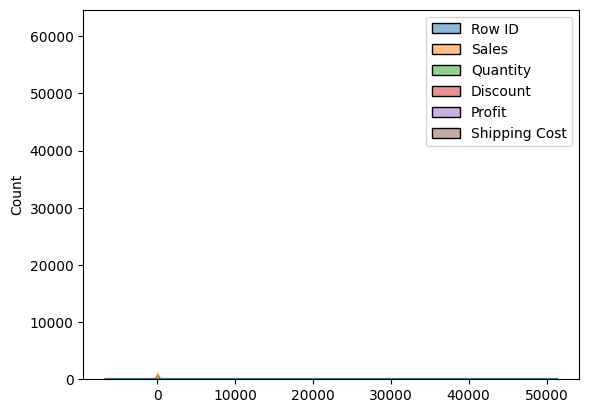

In [ ]:
#graficando
sns.histplot(df_sps, kde=True, color='blue')

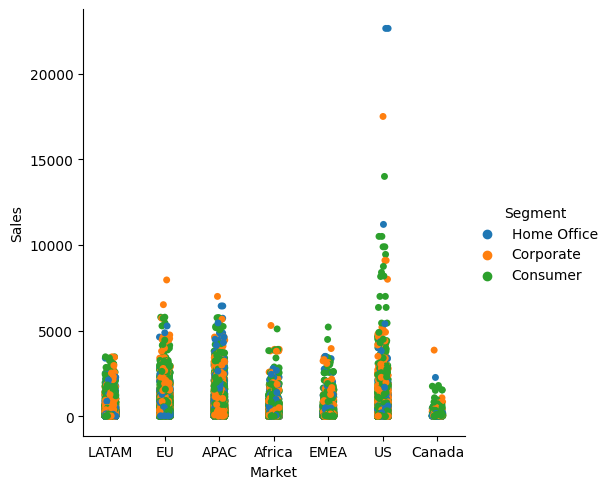

In [ ]:
sns.catplot(x='Market', hue='Segment',
            y='Sales', data=df_sps)

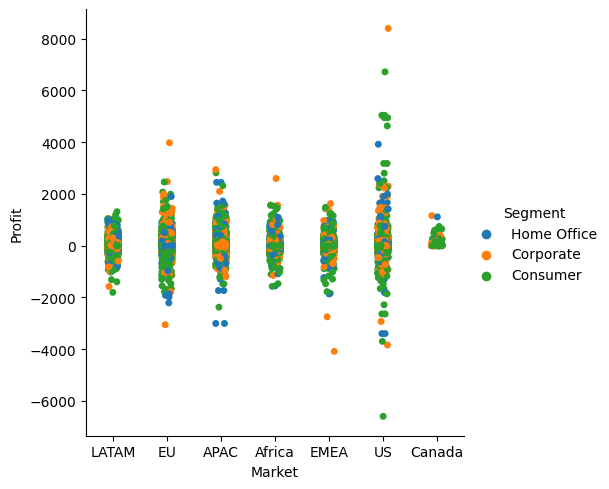

In [ ]:
sns.catplot(x='Market', hue='Segment',
            y='Profit', data=df_sps)

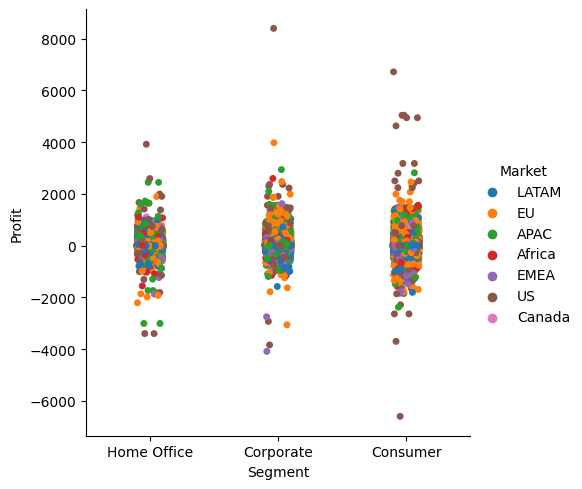

In [ ]:
sns.catplot(x='Segment', hue='Market',
            y='Profit', data=df_sps)

<Axes: xlabel='Market', ylabel='count'>

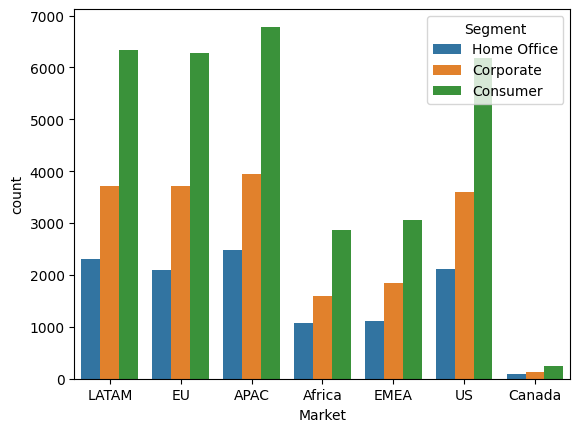

In [ ]:
sns.countplot(data=df_sps, x="Market", hue="Segment")

<Axes: xlabel='Market', ylabel='Profit'>

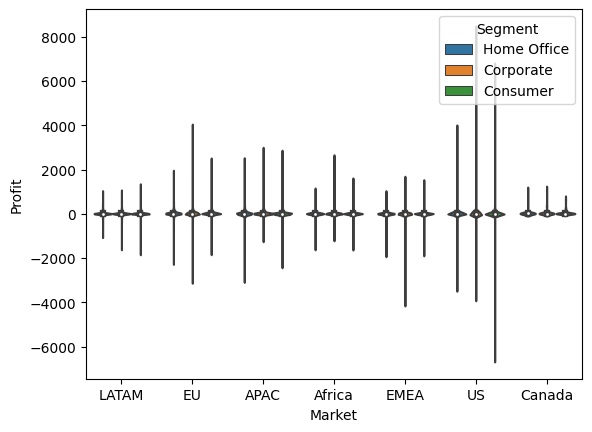

In [ ]:
sns.violinplot(x="Market", y="Profit", hue="Segment", data=df_sps)

# Conclusiones

**Analisis de las variables Sales vs Market y Segment.**
Se deduce que el Market APAC es la región que genera más Ventas en comparación con las otras regiones, seguido por LATAM, EU, Y US. Aunque US no es la región a la que más ordenes de pedidos se envían, si presenta una caracteristica ya que posee la desviación estandar más alta en comparación a las otras regiones. Es importante destacar que el segmento de Consumer es el que predomina en todos los Markets, por lo que la venta al detalle es esencial para la rentabilidad del negocio.

**Analisis de las variables Profit vs Market y Segment**

Segun los datos en las tablas y gráficas, Canada es la región que no genera pérdidas por completo para la empresa, siendo la que más ganancia da en promedio por pedido, esto es posible ya sea porque la organización tenga localidad en Canada y por ello no genere pérdidas, o que la empresa como tal poseea beneficio de algún tratado de libre comercio establecido con Canada y su país.